# Entropy of independent sources


## Entropy of binary encoding: the binary entropy function

The binary entropy function $H_{b}(p)$ is defined as the entropy of a Bernoulli process. The Bernoulli process is modeled as a random variable X that can take only $n=2$ values: 0 and 1 with the probability of success $P[X=1]=p$ and probability of failure of $P[X=0]=1-p$.  

Proof analytically that the entropy equals $$H(X)=H_{b}(p) = \frac{1}{\ln2}\left(p\ln\frac{1-p}{p}-\ln(1-p)\right)$$

Plot the function and interprete the points for $p=0$, $p=0.25$, $p=0.5$, and $p=1$. Note that the function evaluation for $p=0$ and $p=1$ requires special attention!

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


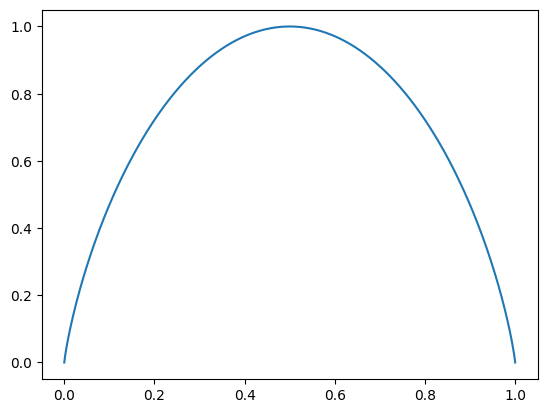

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from math import log

def H(p):
    return (1 / log(2)) * ( p * log(( 1-p ) / p) - log( 1 - p ))

xpoints = np.linspace(0, 1, 1001)
print(xpoints)
ypoints = [0] + [H(x) for x in xpoints[1: 1000]] + [0]

plt.plot(xpoints, ypoints)


##  Entropy of acadenic example

Consider a discrete source $X$ with an alphabet of length $n=4$ for which the probabilities for the occurrences is given by $p(x_i)=[0.4, 0.3, 0.2]$ for $i=1,\ldots,3$. Compute the entropy of the source (expressed in bit/symbol) 
$$ H(X) = -\sum_{i=1}^n p(x_i) \log_2 (p(x_i)) $$
and the maximal entropy $$ H_{max} = \log_2 (n)$$ which is obtained for uniform distributed sources with $p(x_i) = 1/n$.

Since $p_i$ represents a probability, we have to ensure that the sum of all $p_i$ s is equal to one $$\sum_{i=1}^n p(x_i) = 1.$$

In [34]:
from math import log2
px = [0.1, 0.4, 0.3, 0.2] # i = 0 must be 0.1 because 0.4 + 0.3 + 0.2 = 0.9

Hx = - sum(pxi * log2(pxi) for pxi in px)
Hmax = log2(4)

print (f"H(X) = {Hx}")
print(f"Hmax = {Hmax}")


H(X) = 1.8464393446710154
Hmax = 2.0


### Information rate and channel capacity

The entropy measures the amount of information generated by a source. The information rate measures the amount of information generated **per time unit**.

The information rate 
can be written for a binary coder as 
$$ R(X) = \frac{1}{<N>} H(X) $$
with $<N>$ the average length
$$ <N> = \sum_{i=1}^n p(x_i) N(x_i).$$

## Entropy using letter frequency in English

Consider that the different letters/symbols within English are independent and that each letter from 'a' to 'z' + 'space' represent a symbol with $p_i('a', \ldots, 'z')$ =
[0.065, 0.012, 0.022, 0.035, 0.104, 0.020, 0.016, 0.049, 0.056, 0.001, 0.005, 0.033, 0.020, 0.056, 0.060, 0.014, 0.001, 0.050, 0.052, 0.073, 0.022, 0.008, 0.017, 0.001, 0.015, 0.001] and $p_i('space')=0.192$.

Determine the self-information $$ S_i = - \log_2(p_i) $$ of each character and the entropy of an English text (assuming that all charaters are independent).

Determine the entropy of the English source $$ H_X = \sum_{i=1}^n p_i S_i. $$

In [35]:
# p from above with the space added to the front
p = [0.192, 0.065, 0.012, 0.022, 0.035, 0.104, 0.020, 0.016, 0.049, 0.056, 0.001, 0.005, 0.033, 0.020, 0.056, 0.060, 0.014, 0.001, 0.050, 0.052, 0.073, 0.022, 0.008, 0.017, 0.001, 0.015, 0.001]
def S(i):
    return -log2(p[i])

Hx = sum((p * S(i)) for i, p in enumerate(p))
print(f"Hx = {Hx}")

Hx = 4.071636595816461


Determine the maximal entropy (for uniformly distributed symbols).

In [36]:
Hmax = log2(27)
print(f"Hmax = {Hmax}")

Hmax = 4.754887502163468


Compute the the efficiency.

In [37]:
efficiency = Hx / Hmax
print(f"efficiency = {efficiency}")

efficiency = 0.8563055580103359


# Entropy of morse code

Consider the above probabilities for the English characters and assume that the relative lenght of a morse code for characters from 'a' to 'z' is given as [8, 12, 14, 10, 4, 12, 12, 10, 6, 16, 12, 12, 10, 8, 14, 14, 16, 10, 8, 6, 10, 12, 12, 14, 16, 14] and equals 4 for a space. This is  expressed in time units (a single dot equals 2 time units). Remark that the entropy of the source remains identical to the previous question, namely the entropy of the letter frequency in English.

Determine the average duration of a symbol and the the information rate.

In [38]:
# morse lengths with space added in the front
N = [4, 8, 12, 14, 10, 4, 12, 12, 10, 6, 16, 12, 12, 10, 8, 14, 14, 16, 10, 8, 6, 10, 12, 12, 14, 16, 14]

avgN = sum(px * nx for (px, nx) in zip(p, N))
print(f"<N> = {avgN}")
Rx = Hx / avgN
print(f"Rx = {Rx}")

<N> = 8.078
Rx = 0.5040401826957739


Determine the maximal entropy $H_{max}$ assuming uniformly distributed symbols.

In [39]:
Hmax = log2(27)
print(f"Hmax = {Hmax}")

Hmax = 4.754887502163468


# Entropy of Calligraphy in English 

What is the amount of information per symbol when using the "calligraphical" information of an English text (i.e. compare "Amount of information is normal font compared to capital letters" to "AMOUNT OF INFORMATION IS NORMAL FONT COMPARED TO CAPITAL LETTERS") Therefore consider 5 groups of symbols
1. "aceimnorsuvwxz": neither sticks nor tails,
2. "bdhklt": only sticks,
3. "gjpqy": only tails,
4. "f": both sticks and tails, and
5. " ": a space.

Compute the entropy of Calligraphy in English

In [40]:
letters = [' ','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

dictionary = {letter: px for letter, px in zip(letters, p)}
probs = [0, 0, 0, 0, 0]

for letter, px in dictionary.items():
    if letter in "aceimnorsuvwxz":
        probs[0] += px
    elif letter in "bdhklt":
        probs[1] += px
    elif letter in "gjpqy":
        probs[2] += px
    elif letter in "f":
        probs[3] += px
    else:
        probs[4] += px

def S2(i):
    return -log2(probs[i])

Hx = sum((px * S2(i)) for i, px in enumerate(probs))

print(f"Hx = {Hx}")

Hx = 1.7310038188735146
